In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Heart_Disease.csv")
df.head()

,age,sex,Chest Pain Type,trestbps,chol,fbs,cardio_result,max_heartrate,exercise_angina,ST_depression,slope,no_majorvessel(0-3),thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age                    0
sex                    0
Chest Pain Type        0
trestbps               0
chol                   0
fbs                    0
cardio_result          0
max_heartrate          0
exercise_angina        0
ST_depression          0
slope                  0
no_majorvessel(0-3)    0
thal                   0
target                 0
dtype: int64

In [ ]:
#Data preprocessing
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=df.drop('target',axis='columns')

In [ ]:
y=df['target']

In [ ]:
X

,age,sex,Chest Pain Type,trestbps,chol,fbs,cardio_result,max_heartrate,exercise_angina,ST_depression,slope,no_majorvessel(0-3),thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
parameter={
            'criterion' :['gini', 'entropy', 'log_loss'],
            'splitter' :['best', 'random'],
            'max_depth':[1,2,3,4,5],
            'max_feature':['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#model=DecisionTreeClassifier(max_depth=2)
model=DecisionTreeClassifier()
cv=GridSearchCV(model,param_grid=parameter,cv=5,scoring="accuracy")

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[23,  7],
       [ 9, 22]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7377049180327869

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.4920212765957447, 0.95, 'x[2] <= -0.469\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(0.26063829787234044, 0.85, 'x[11] <= -0.226\ngini = 0.377\nsamples = 111\nvalue = [83, 28]'),
 Text(0.1595744680851064, 0.75, 'x[8] <= 0.39\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.0851063829787234, 0.65, 'x[12] <= 0.346\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.0425531914893617, 0.55, 'x[7] <= -2.255\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.02127659574468085, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06382978723404255, 0.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.1276595744680851, 0.55, 'x[6] <= -0.071\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.10638297872340426, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.14893617021276595, 0.45, 'x[0] <= -1.475\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1276595744680851, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1702127659574

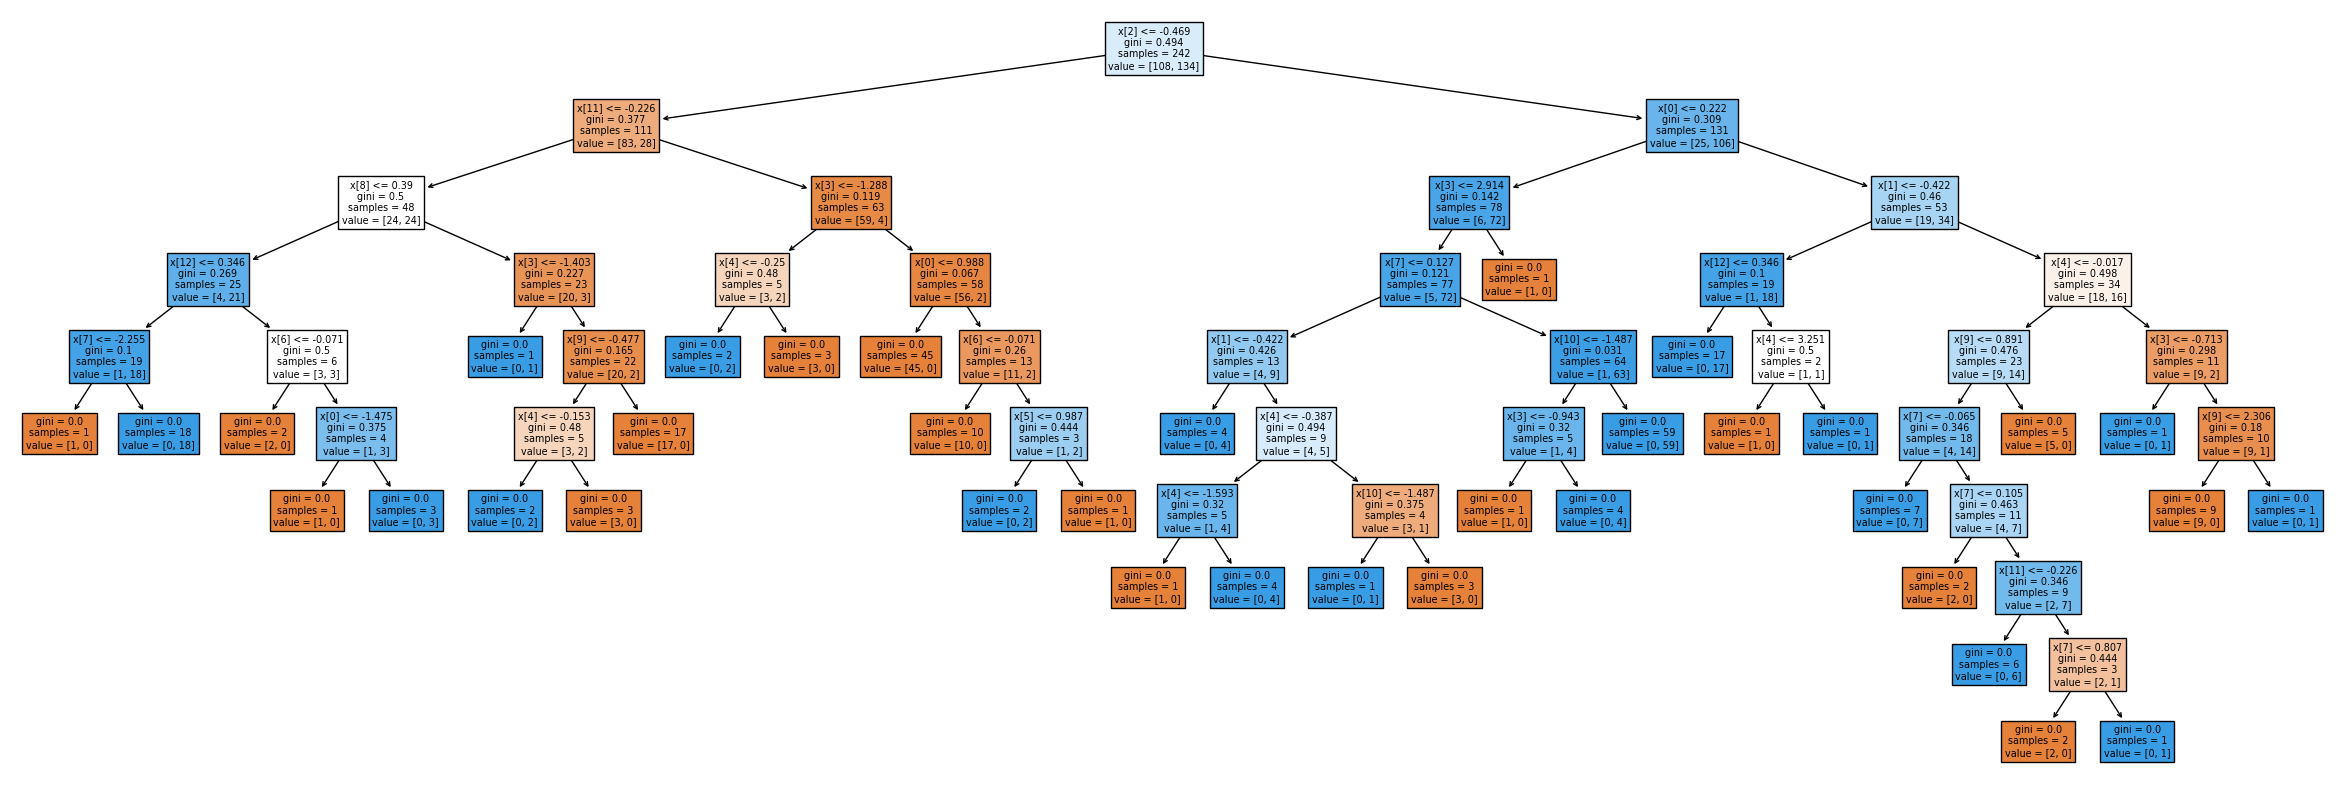

In [ ]:
plt.figure(figsize=(30,10))
tree.plot_tree(model,filled=True)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#model=DecisionTreeClassifier(max_depth=2)
model=DecisionTreeClassifier()
cv=GridSearchCV(model,param_grid=parameter,cv=5,scoring="accuracy")

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  9],
       [ 6, 25]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7540983606557377